Regularización
===

* *30 min* | Última modificación: Julio 13, 2019.

## Definición del problema real

Se desea construir un modelo de regresión no lineal para la siguiente muestra de datos de $(x, y)$. 

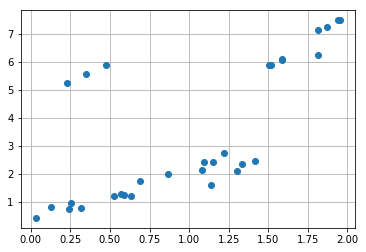

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [1.8131, 0.0318, 1.5181, 0.2522, 0.2440, 1.4175, 
     1.9538, 1.1506, 1.5042, 1.0798, 1.0915, 0.3173, 
     1.8157, 1.3352, 1.1399, 0.1276, 0.6909, 0.6331, 
     0.8671, 0.5867, 1.9373, 1.5842, 0.5707, 0.5285, 
     1.8708, 1.5870, 1.3027, 1.2181, 0.2318, 0.3471, 
     0.4763]

d = [7.1568, 0.4351, 5.8980, 0.9654, 0.7383, 2.4500, 
     7.4851, 2.4401, 5.8941, 2.1366, 2.4431, 0.8058, 
     6.2531, 2.3671, 1.6199, 0.8230, 1.7403, 1.2172, 
     1.9868, 1.2564, 7.4922, 6.0645, 1.2978, 1.2245, 
     7.2532, 6.1206, 2.1076, 2.7601, 5.2678, 5.5783, 
     5.8991]

plt.plot(x, d, 'o')
plt.grid()

## Definición del problema en términos de los datos

Se desea construir un modelo no lineal que relacione las variables $x$ y $y$.

## Metodología 

### Modelo matemático

El modelo regresión + MLP se definio como:

$$y_t = \phi^* + \sum_i \phi_i x_i +  \sum_{h} \beta_h \cdot \sigma \left(w_h + \sum_{i} w_{i,h} x_i \right)  + e_i$$

donde todos los parámetros serían estimados simultáneamente mediante la minimización del error.

### Solución numérica inicial

In [2]:
##
## Parametros
##
H = 3
learning_rate=0.01
max_iter=10000

##
## Datos
##
X = [[u] for u in x]
N = len(X[0])
P = len(X)

X_ = tf.constant(X, dtype=np.float32)
d_ = tf.constant(d, dtype=np.float32, shape=[len(d), 1])
    
##
## Info pronostico
##
Xpred = np.linspace(np.min(x), np.max(x), 50, dtype=np.float32)
Xpred = [[u] for u in Xpred]
Xpred_ = tf.constant(Xpred)

##
## Parámetros
##
intercept = tf.Variable(0.1 * np.mean(d),            dtype=np.float32)
LRparams  = tf.Variable(0.1 * np.random.randn(N, 1), dtype=np.float32)
WHOparams = tf.Variable(0.1 * np.random.randn(H, 1), dtype=np.float32)
WIHparams = tf.Variable(0.1 * np.random.randn(N, H), dtype=np.float32)
BHparams  = tf.Variable(0.1 * np.random.randn(H, 1), dtype=np.float32)

##
## Propagación de la señal
##
LR_output = tf.matmul(X_, LRparams)
LR_output = tf.add(intercept, LR_output)
In_hidden = tf.add(tf.matmul(X_, WIHparams),
                   tf.tile(tf.transpose(BHparams), [P, 1]))
Out_hidden = tf.sigmoid(In_hidden)        
MLP_output = tf.matmul(Out_hidden, WHOparams)
model_output = tf.add(LR_output, MLP_output)

##
## Función de error
##

# SSE = tf.reduce_sum(tf.square(d_ - model_output)) # sum of the squared errors
SSE = tf.reduce_sum(tf.abs(d_ - model_output)) # sum of the squared errors

##
## Optimizador
##
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(SSE)

##
## Pronostico
##
LR_output = tf.matmul(Xpred_, LRparams)
LR_output = tf.add(intercept, LR_output)
In_hidden = tf.add(tf.matmul(Xpred_, WIHparams),
                   tf.tile(tf.transpose(BHparams), [len(Xpred), 1]))
Out_hidden = tf.sigmoid(In_hidden)        
MLP_output = tf.matmul(Out_hidden, WHOparams)
ypred = tf.add(LR_output, MLP_output)



##
## Ejecución 
##
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(max_iter):
        sess.run(optimizer)
    p = sess.run(ypred)
    e = sess.run(SSE) 

print('SSE = ', e)
plt.plot(x, d, 'o')
plt.plot(Xpred, p, '-')
plt.grid()

NameError: name 'tf' is not defined

### Penalización

Se puede modificar la función de error, usando en vez del error cuadrático, el error absoluto.

Se puede adicionar penalizaciones para mejorar el comportamiento del modelo asi:

* Ridge Regression

* Lasso

* Elastic net


**Actividad.--** Experimente con los parámetros del modelo para analizar si es posible conseguir un ajuste mejor.

In [167]:
##
## Parametros
##
H = 8
learning_rate=0.001
max_iter=10000

##
## Datos
##
X = [[u] for u in x]
N = len(X[0])
P = len(X)

X_ = tf.constant(X, dtype=np.float32)
d_ = tf.constant(d, dtype=np.float32, shape=[len(d), 1])
    
##
## Info pronostico
##
Xpred = np.linspace(np.min(x), np.max(x), 50, dtype=np.float32)
Xpred = [[u] for u in Xpred]
Xpred_ = tf.constant(Xpred)

##
## Parámetros
##
intercept = tf.Variable(0.1 * np.mean(d),            dtype=np.float32)
LRparams  = tf.Variable(0.1 * np.random.randn(N, 1), dtype=np.float32)
WHOparams = tf.Variable(0.1 * np.random.randn(H, 1), dtype=np.float32)
WIHparams = tf.Variable(0.1 * np.random.randn(N, H), dtype=np.float32)
BHparams  = tf.Variable(0.1 * np.random.randn(H, 1), dtype=np.float32)

##
## Propagación de la señal
##
LR_output = tf.matmul(X_, LRparams)
LR_output = tf.add(intercept, LR_output)
In_hidden = tf.add(tf.matmul(X_, WIHparams),
                   tf.tile(tf.transpose(BHparams), [P, 1]))
Out_hidden = tf.sigmoid(In_hidden)        
MLP_output = tf.matmul(Out_hidden, WHOparams)
model_output = tf.add(LR_output, MLP_output)

##
## Función de error
##

SSE = tf.reduce_sum(tf.square(d_ - model_output)) # sum of the squared errors
#SSE = tf.reduce_sum(tf.abs(d_ - model_output)) # sum of the squared errors
PENS0 = tf.square(intercept)
PENS1 = tf.reduce_sum(tf.square(LRparams))
PENS2 = tf.reduce_sum(tf.square(WHOparams))
PENS3 = tf.reduce_sum(tf.square(WIHparams))
PENS4 = tf.reduce_sum(tf.square(BHparams))

PENA0 = tf.abs(intercept)
PENA1 = tf.reduce_sum(tf.abs(LRparams))
PENA2 = tf.reduce_sum(tf.abs(WHOparams))
PENA3 = tf.reduce_sum(tf.abs(WIHparams))
PENA4 = tf.reduce_sum(tf.abs(BHparams))

PENS = tf.add_n([PENS0, PENS1, PENS2, PENS3, PENS4])
PENA = tf.add_n([PENA0, PENA1, PENA2, PENA3, PENA4])

SSE = tf.add(SSE, tf.multiply(0.0000, PENS))
SSE = tf.add(SSE, tf.multiply(0.9000, PENA))

##
## Optimizador
##
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(SSE)

##
## Pronostico
##
LR_output = tf.matmul(Xpred_, LRparams)
LR_output = tf.add(intercept, LR_output)
In_hidden = tf.add(tf.matmul(Xpred_, WIHparams),
                   tf.tile(tf.transpose(BHparams), [len(Xpred), 1]))
Out_hidden = tf.sigmoid(In_hidden)        
MLP_output = tf.matmul(Out_hidden, WHOparams)
ypred = tf.add(LR_output, MLP_output)

##
## Ejecución 
##
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(max_iter):
        sess.run(optimizer)
    p = sess.run(ypred)
    e = sess.run(SSE) 

print('SSE = ', e)
plt.plot(x, d, 'o')
plt.plot(Xpred, p, '-')
plt.grid()

KeyboardInterrupt: 

---